In [1]:
import numpy as np
from scipy.signal import lfilter, butter
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from scipy.signal import welch

In [2]:
def load_subject_data(subject, filetype, start_series, end_series):
    ''' Loads the data or events specified as filetype for a subject. The series
    are specified to build a training and testing sets. '''
    path = r'C:/Users/tomry/Documents/EEG/train/'
    series = range(start_series, end_series+1)
    subject_data = []
    for serie in series:
        data_filename = path + 'subj%d_series%d_%s.csv' % (subject, serie, filetype)
        data = pd.read_csv(data_filename)
        subject_data.append(data)
    subj_data = pd.concat(subject_data)
    subj_data.drop('id', inplace=True, axis=1)
    return subj_data.to_numpy()

def causal_filt(x, cutoffs, fs=500, btype='bandpass'):
    ''' Applies a causal IIR filter to x. '''
    b, a = butter(4, cutoffs, fs=fs, btype=btype)
    x_filtered = lfilter(b, a, x, axis=0)
    return x_filtered

def downsample(x, n=3, start=0):
    ''' Downsamples the signals in x by taking every nth sample. '''
    return x[start::n, :]

def decimate(x):
    ''' Decimate the signal by filtering and downsampling. '''
    x = causal_filt(x, [0.5, 80])
    x = downsample(x)
    return x

In [3]:
x_train = load_subject_data(1, 'data', 1, 6)
x_train_processed = decimate(x_train)

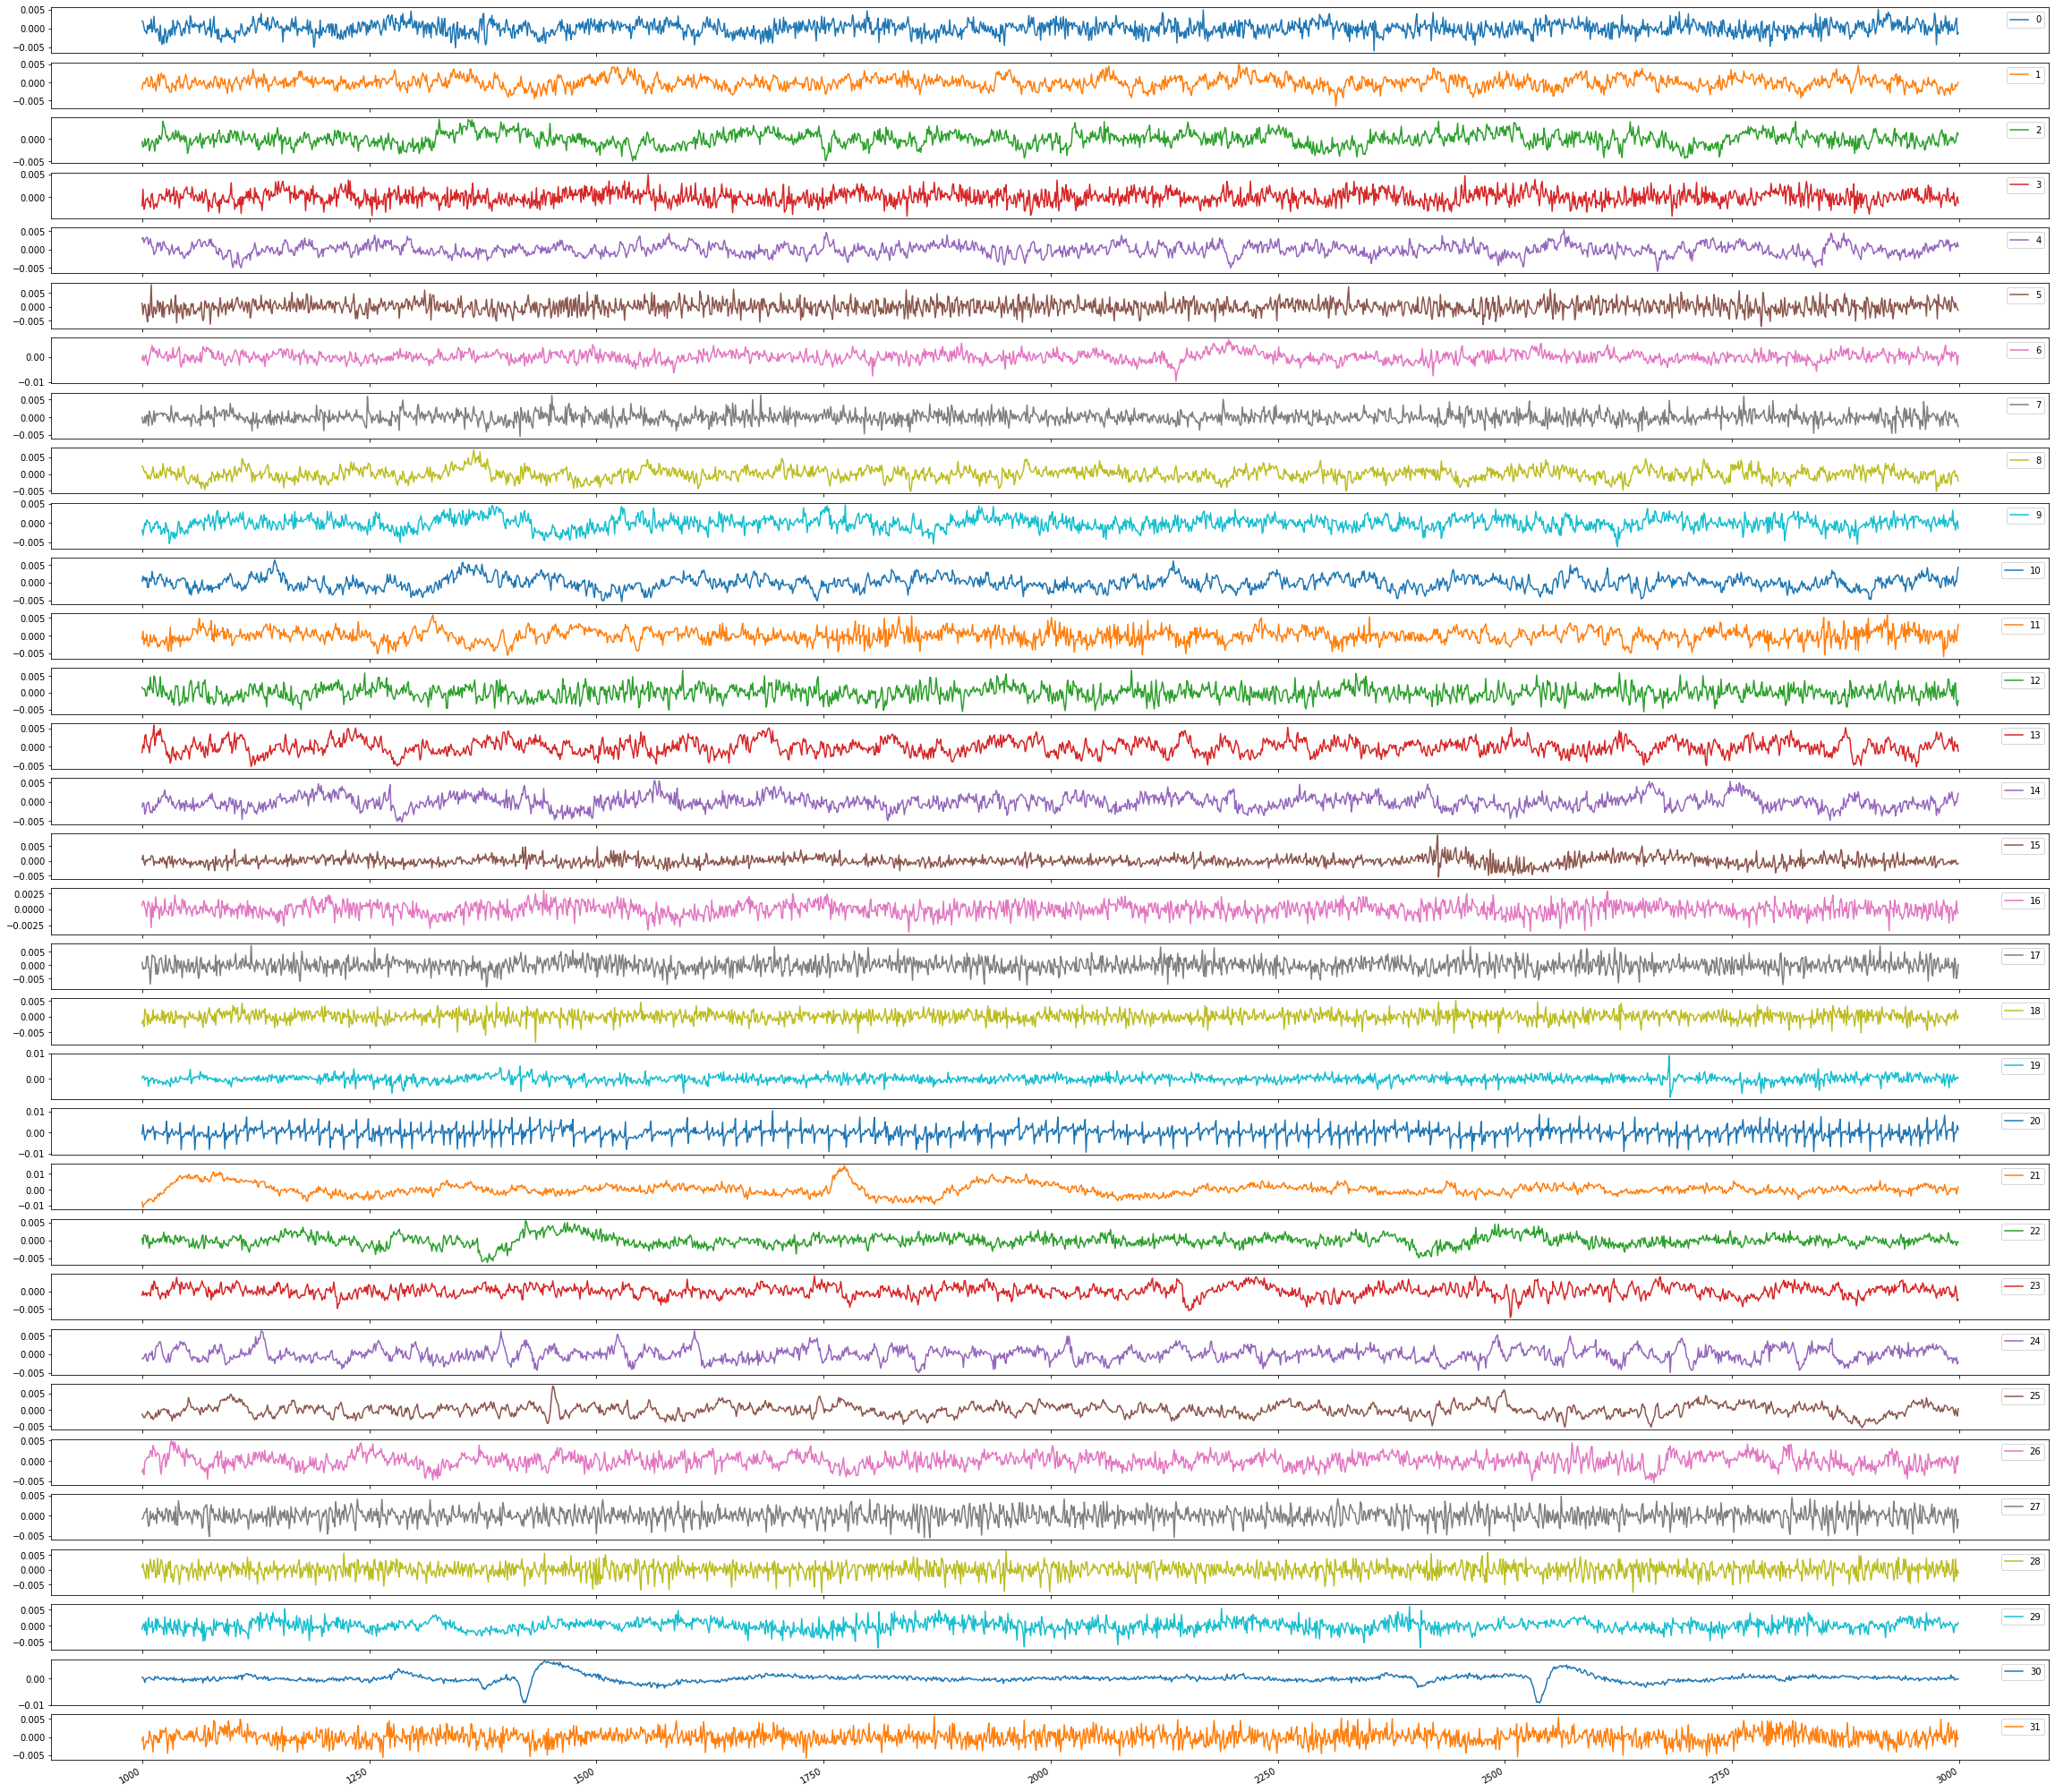

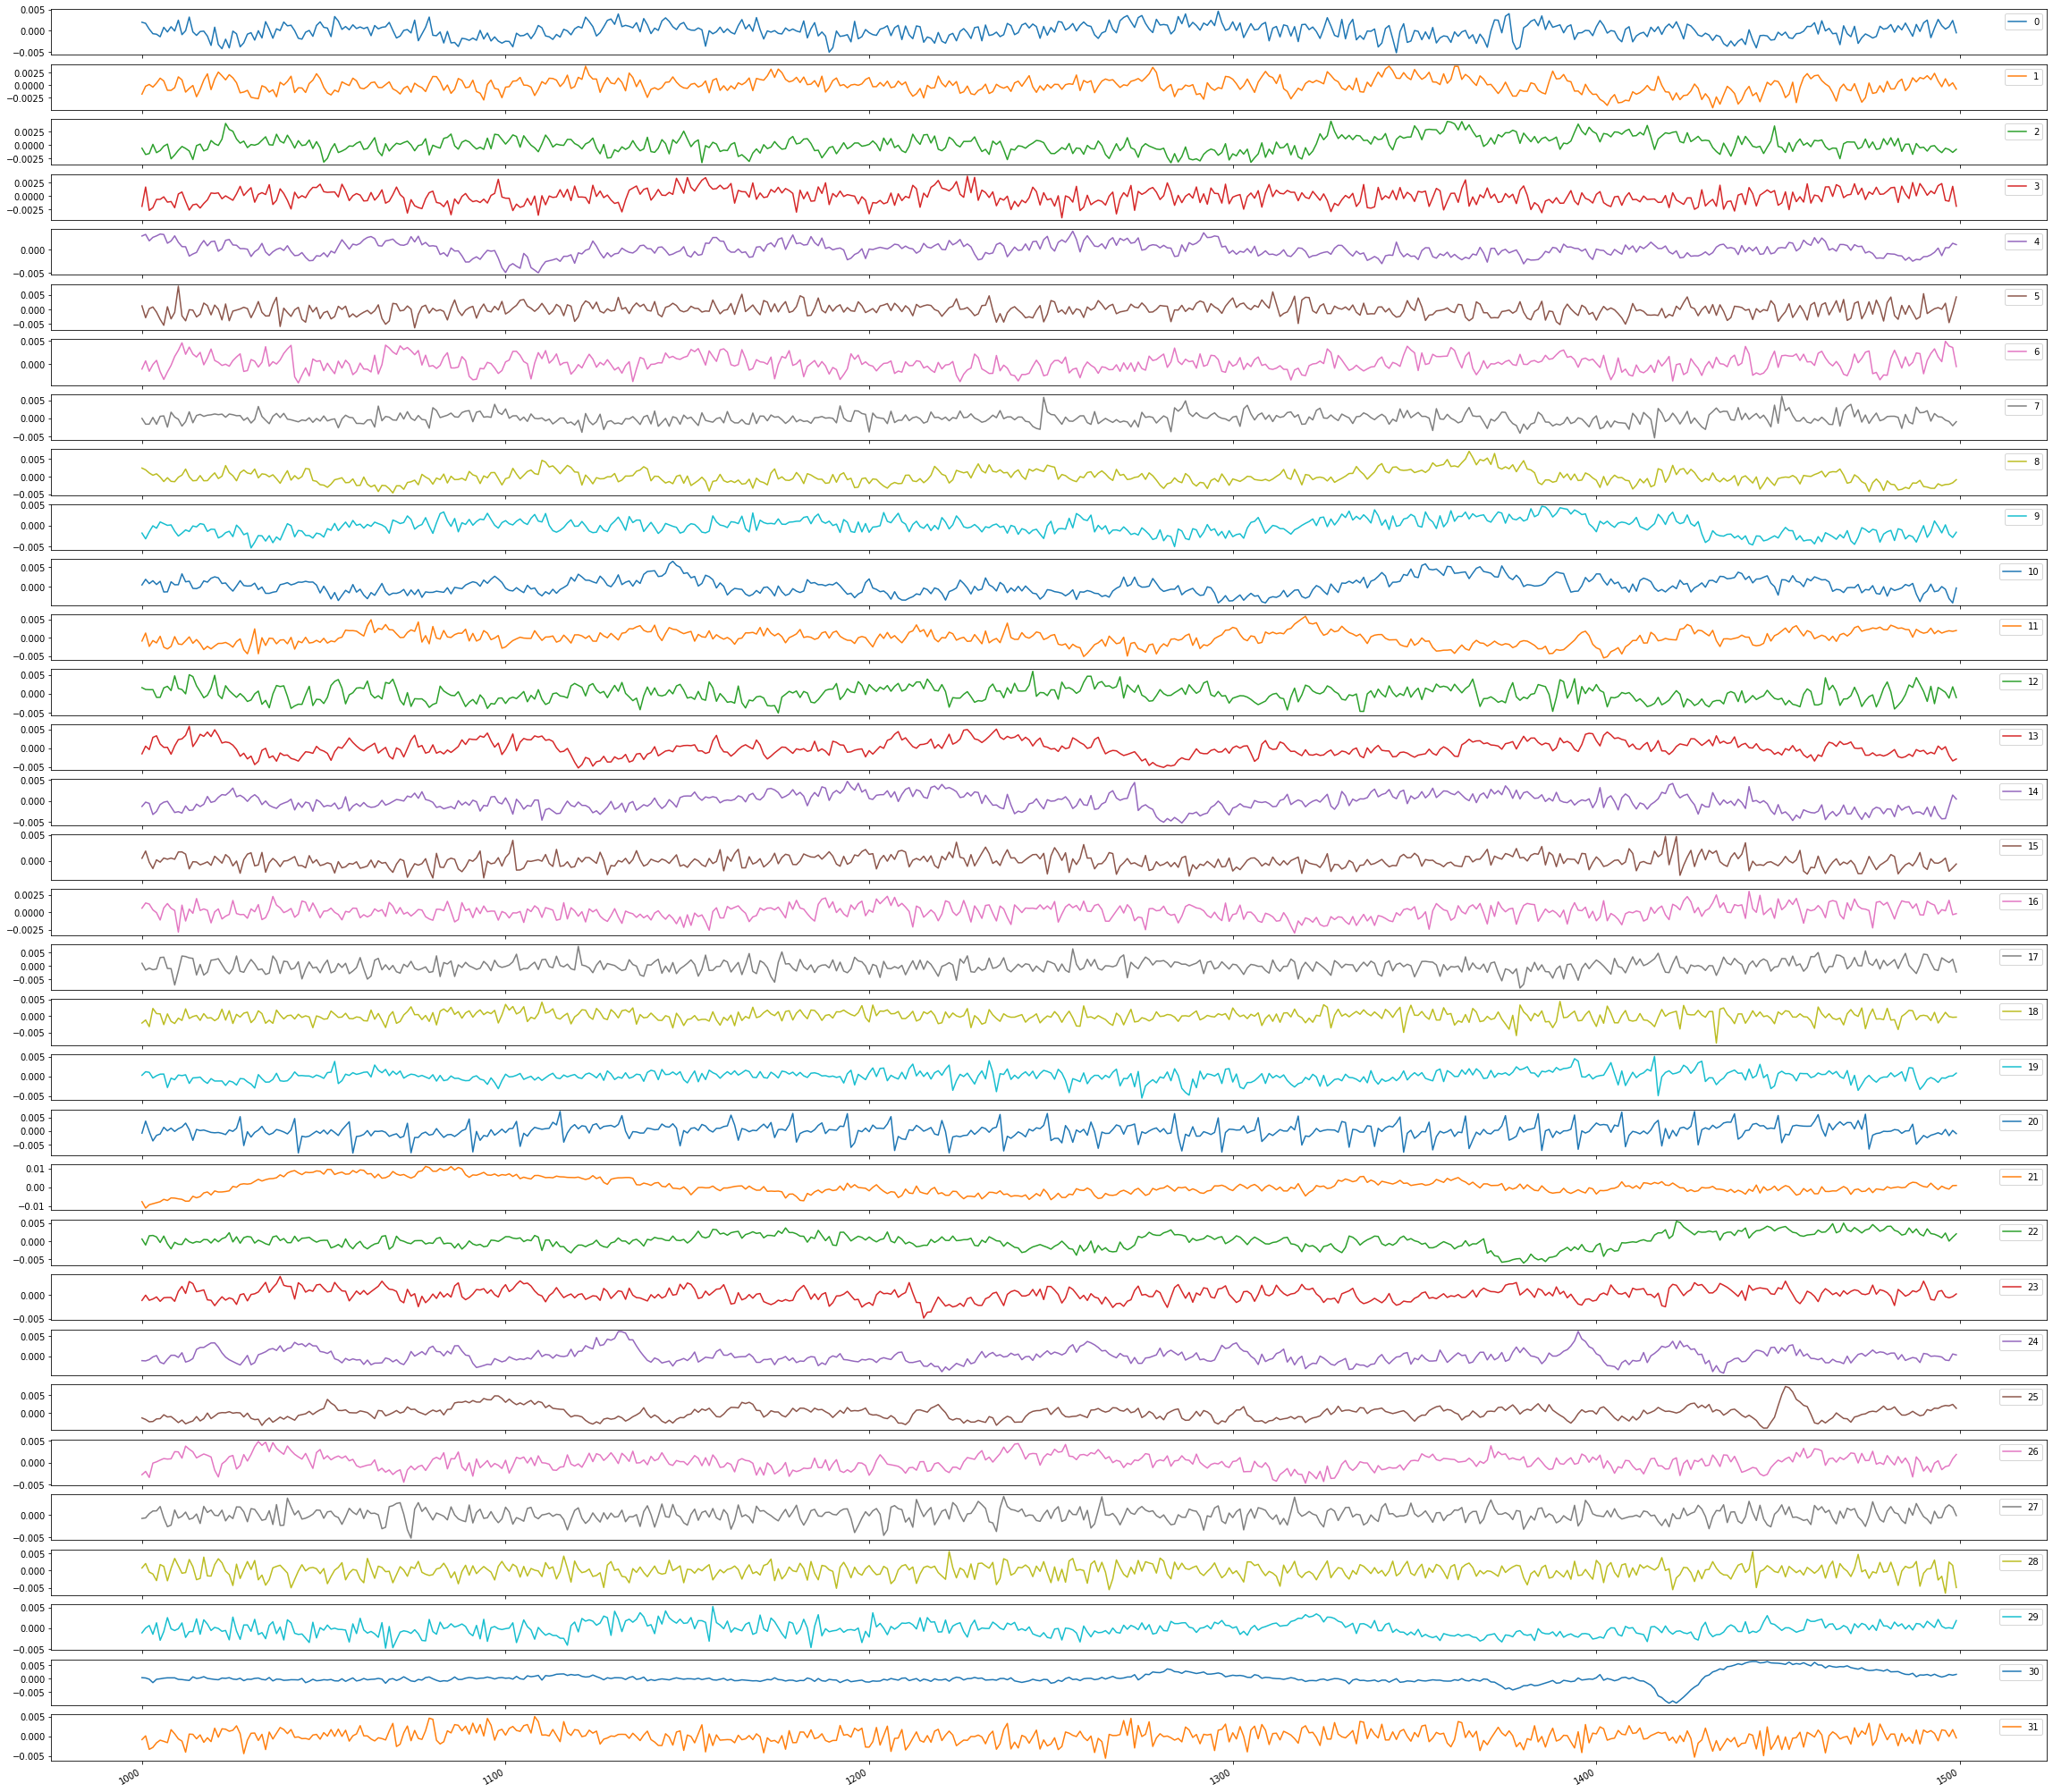

In [4]:
ica = FastICA().fit(x_train_processed)
independent_sources = ica.transform(x_train_processed)
# plot channels for manual inspection
independent_sources_df = pd.DataFrame(data=independent_sources)
independent_sources_df.iloc[1000:3000,:].plot(subplots=True, figsize=(40,40))
plt.show()
independent_sources_df.iloc[1000:1500,:].plot(subplots=True, figsize=(40,40))
plt.show()

In [5]:
independent_sources[:, 30] = 0
x_clean = ica.inverse_transform(independent_sources)

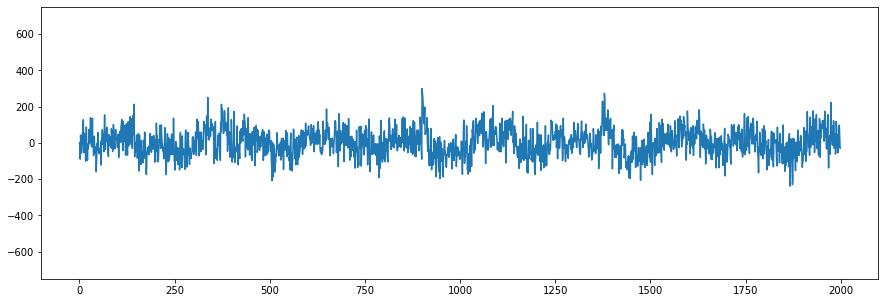

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

ax.plot(x_clean[0:2000,0])
ax.set_ylim([-750,750])

plt.show()    

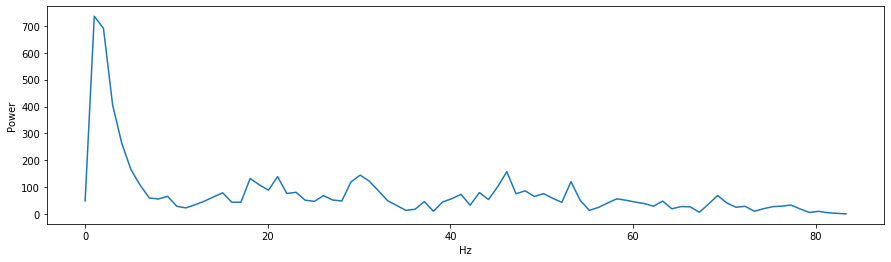

In [24]:
win_length_s = 2
fs = 500/3
win_length_samples = int(win_length_s*fs)
i = 1000
x_window = x_clean[i-(win_length_samples-1):i+1, 0]
freqs, psd = welch(x_window, fs=500/3, window='hann', axis=0, nperseg=len(x_window)/2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
ax.plot(freqs,psd)
plt.xlabel('Hz')
plt.ylabel('Power')
plt.show()

In [21]:
print(freqs)

[0.         0.01204819 0.02409639 0.03614458 0.04819277 0.06024096
 0.07228916 0.08433735 0.09638554 0.10843373 0.12048193 0.13253012
 0.14457831 0.15662651 0.1686747  0.18072289 0.19277108 0.20481928
 0.21686747 0.22891566 0.24096386 0.25301205 0.26506024 0.27710843
 0.28915663 0.30120482 0.31325301 0.3253012  0.3373494  0.34939759
 0.36144578 0.37349398 0.38554217 0.39759036 0.40963855 0.42168675
 0.43373494 0.44578313 0.45783133 0.46987952 0.48192771 0.4939759 ]
